In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import xesmf as xe
import os
import sys
from pathlib import Path
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt


HOME = Path(os.getcwd()).parents[0]

sys.path.insert(1, str(HOME))

from dsrnngan import data, read_config
from dsrnngan.noise import NoiseGenerator

In [3]:
import yaml
from glob import glob
from dsrnngan.evaluation import setup_inputs
from dsrnngan.data import DATA_PATHS

model_folder='/user/home/uz22147/logs/cgan/d34d309eb0e00b04'

model_weights_root = os.path.join(model_folder, "models")
config_path = os.path.join(model_folder, 'setup_params.yaml')
df_dict = read_config.read_config()['DOWNSCALING']

most_recent_model = sorted(glob(os.path.join(model_weights_root, '*.h5')))[-1]

In [4]:
with open(config_path, 'r') as f:
    try:
        setup_params = yaml.safe_load(f)
    except yaml.YAMLError as exc:
        print(exc)

mode = setup_params["GENERAL"]["mode"]
arch = setup_params["MODEL"]["architecture"]
padding = setup_params["MODEL"]["padding"]
batch_size = 1  # setup_params["TRAIN"]["batch_size"]
fcst_data_source=setup_params['DATA']['fcst_data_source']
obs_data_source=setup_params['DATA']['obs_data_source']
input_channels = setup_params['DATA']['input_channels']
constant_fields = setup_params['DATA']['constant_fields']
input_image_width = setup_params['DATA']['input_image_width']
output_image_width = input_image_width * df_dict['downscaling_factor']
constants_image_width = input_image_width
problem_type = setup_params["GENERAL"]["problem_type"]
downsample = setup_params['GENERAL']['downsample']
filters_gen = setup_params["GENERATOR"]["filters_gen"]
noise_channels = setup_params["GENERATOR"]["noise_channels"]
latent_variables = setup_params["GENERATOR"]["latent_variables"]
filters_disc = setup_params["DISCRIMINATOR"]["filters_disc"]
num_batches = setup_params["EVAL"]["num_batches"]
add_noise = setup_params["EVAL"]["add_postprocessing_noise"]

val_range = setup_params['VAL'].get('val_range')
min_latitude = setup_params['DATA']['min_latitude']
max_latitude = setup_params['DATA']['max_latitude']
latitude_step_size = setup_params['DATA']['latitude_step_size']
min_longitude = setup_params['DATA']['min_longitude']
max_longitude = setup_params['DATA']['max_longitude']
longitude_step_size = setup_params['DATA']['longitude_step_size']
latitude_range=np.arange(min_latitude, max_latitude, latitude_step_size)
longitude_range=np.arange(min_longitude, max_longitude, longitude_step_size)

print('setting up inputs')

gen, data_gen_valid = setup_inputs(mode=mode,
                                       arch=arch,
                                       records_folder='/user/work/uz22147/tfrecords/d34d309eb0e00b04',
                                       fcst_data_source=fcst_data_source,
                                       obs_data_source=obs_data_source,
                                       latitude_range=latitude_range,
                                       longitude_range=longitude_range,
                                       downscaling_steps=df_dict["steps"],
                                       validation_range=val_range,
                                       downsample=downsample,
                                       input_channels=input_channels,
                                       filters_gen=filters_gen,
                                       filters_disc=filters_disc,
                                       noise_channels=noise_channels,
                                       latent_variables=latent_variables,
                                       padding=padding,
                                       constant_fields=constant_fields,
                                       data_paths=DATA_PATHS)


print('loading weights')
gen.load_weights(most_recent_model)

setting up inputs
generator_input shape: (None, None, None, 20)
constants_input shape: (None, None, None, 2)


2022-11-30 14:12:11.281281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /user/work/uz22147/miniconda3/lib/:/system/slurm/22.05.2/lib:/system/pmix-v3/lib:/user/work/uz22147/miniconda3/lib:/user/work/uz22147/miniconda3/lib/:/user/work/uz22147/miniconda3/lib/
2022-11-30 14:12:11.281481: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 14:12:11.281526: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bp1-login03.data.bp.acrc.priv): /proc/driver/nvidia/version does not exist
2022-11-30 14:12:11.282000: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical oper

upscaled constants shape: (None, None, None, 64)
noise_input shape: (None, None, None, 4)
Shape after first concatenate: (None, None, None, 88)
End of first residual block
Shape after first residual block: (None, None, None, 64)
Shape after upsampling step 1: (None, None, None, 64)
Shape after residual block: (None, None, None, 64)
Shape after second concatenate: (None, None, None, 66)
Shape after third residual block: (None, None, None, 64)
Output shape: (None, None, None, 1)
generator_input shape: (None, None, None, 20)
constants_input shape: (None, None, None, 2)
generator_output shape: (None, None, None, 1)
upscaled constants shape: (None, None, None, 256)
Shape after lo-res concatenate: (None, None, None, 276)
Shape after hi-res concatenate: (None, None, None, 3)
Shape of lo-res input after residual block: (None, None, None, 512)
Shape of hi_res_input after upsampling step 1: (None, None, None, 512)
Shape of hi-res input after residual block: (None, None, None, 512)
Shape after co

0
iMERG max:  30.53702
Forecast max:  3.010110929608345
1
iMERG max:  8.888481
Forecast max:  3.8652699440717706
2
iMERG max:  18.110138
Forecast max:  14.265004545450207
3
iMERG max:  9.608051
Forecast max:  5.189049988985062
4
iMERG max:  16.878433
Forecast max:  7.795587182044983
5
iMERG max:  30.690832
Forecast max:  4.579044878482819
6
iMERG max:  21.199297
Forecast max:  22.095076739788055
7
iMERG max:  24.419228
Forecast max:  2.7350373566150665
8
iMERG max:  14.734892
Forecast max:  15.829004347324368
9
iMERG max:  16.864305
Forecast max:  6.37073628604412


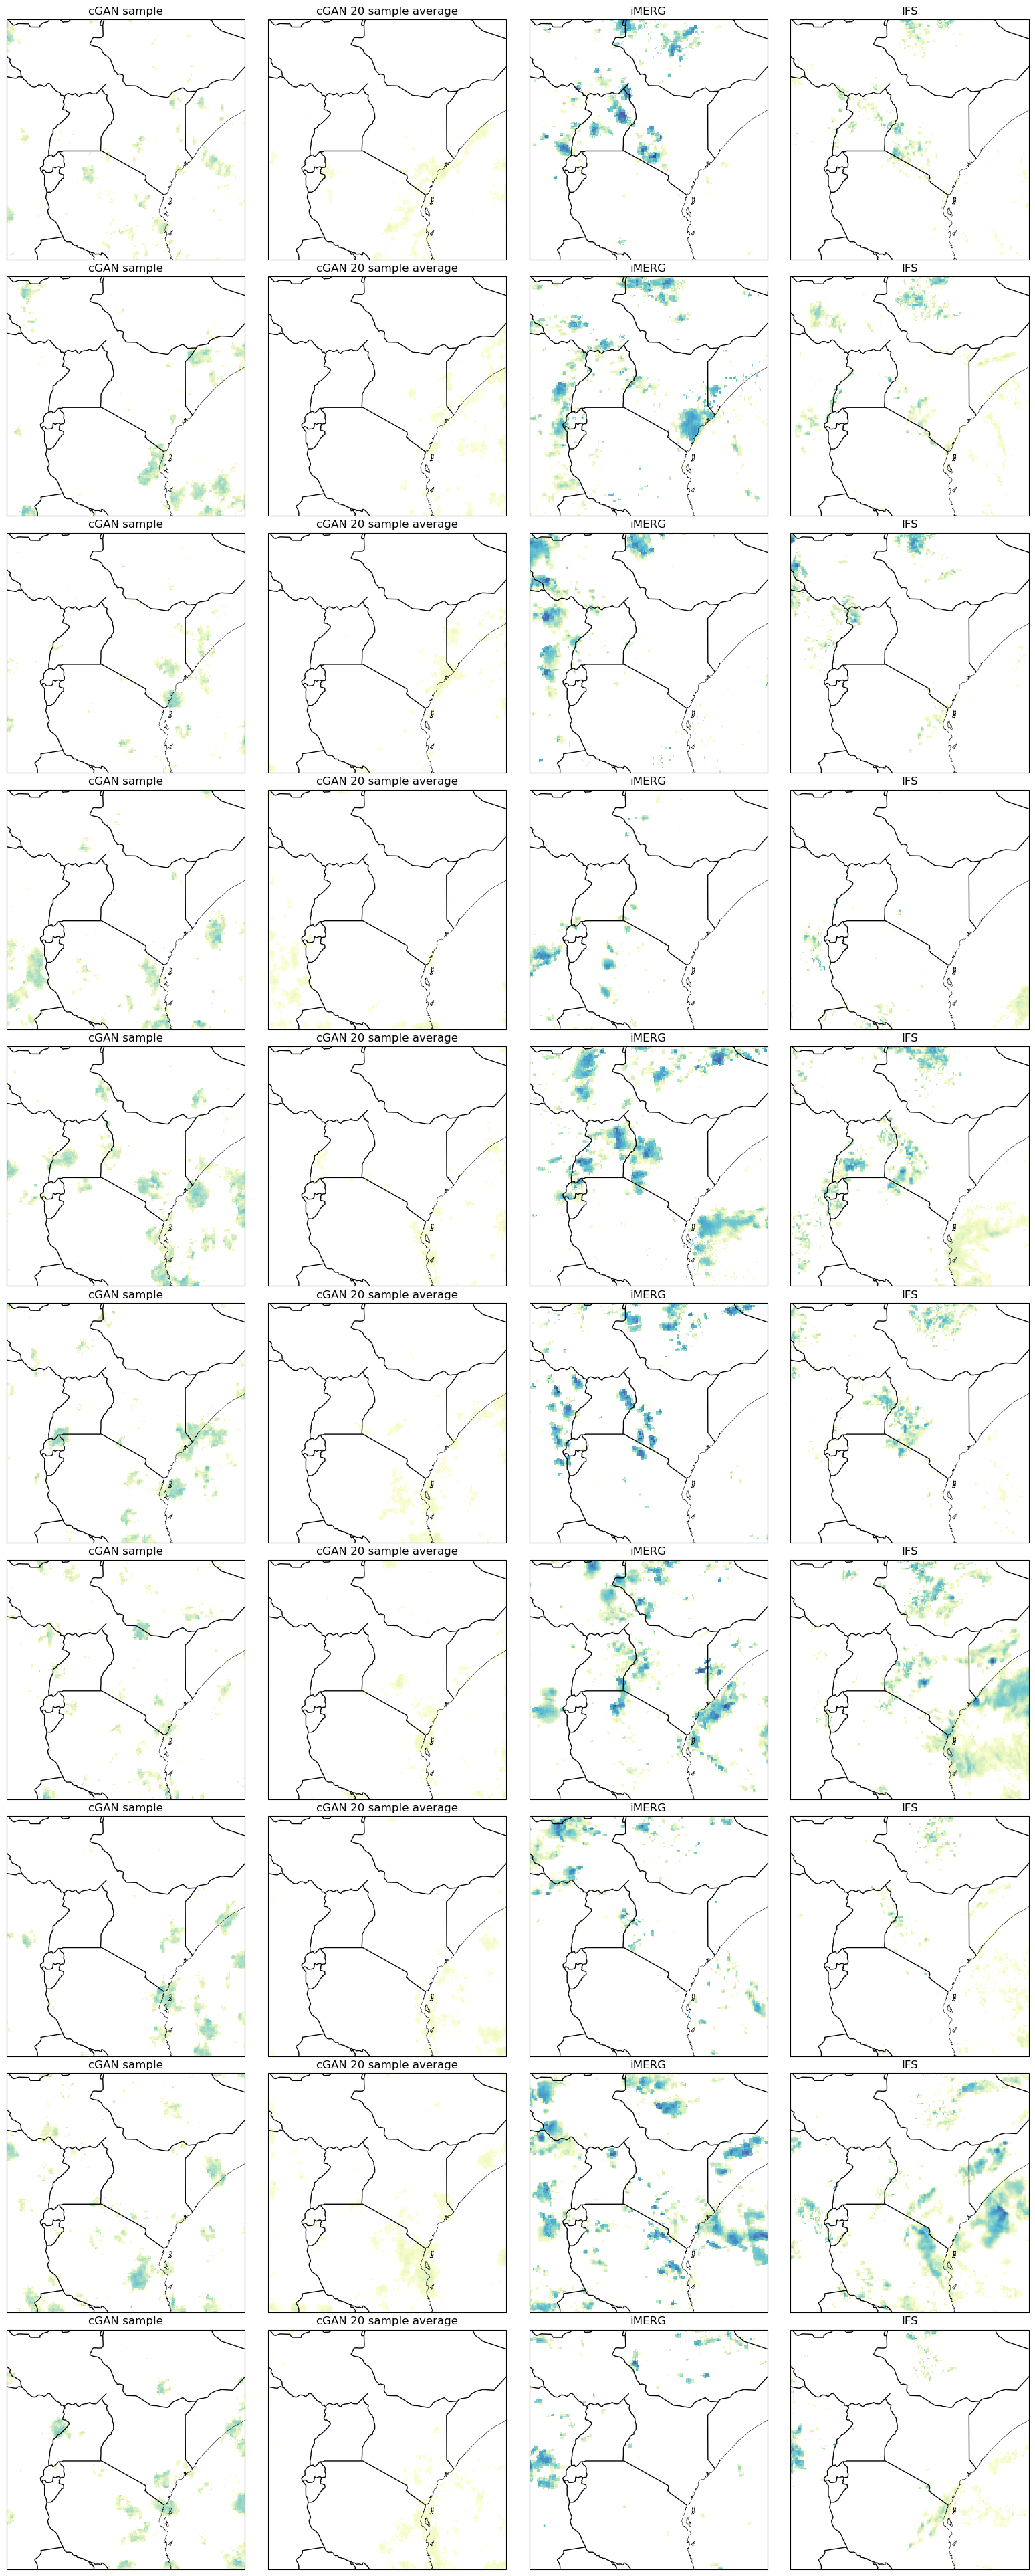

In [57]:
import os
import pickle

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from matplotlib import colorbar, colors, gridspec

from dsrnngan import data
from dsrnngan.noise import NoiseGenerator
from dsrnngan.rapsd import plot_spectrum1d, rapsd
from dsrnngan.thresholded_ranks import findthresh
from dsrnngan.plots import plot_img_log_coastlines
import copy

denormalise_data = True
batch_gen_iter = iter(data_gen_valid)

tp_index = data.all_ifs_fields.index('tp')
palette="YlGnBu"
linewidth = 0.4
cmap = ListedColormap(sns.color_palette(palette, 256))
cmap.set_under('white')
extent = [min(longitude_range), max(longitude_range), min(latitude_range), max(latitude_range)]
alpha = 0.8
spacing = 10
units = "Rain rate [mm h$^{-1}$]"
cb_tick_loc = np.array([0.1, 0.5, 1, 2, 5, 15, 30, 50])
cb_tick_labels = [0.1, 0.5, 1, 2, 5, 15, 30, 50]
value_range_precip=(0.1, 30)
num_samples = 10
num_rows = num_samples
num_cols = 4
ensemble_size = 20

figsize = (num_cols*5, num_rows*5)
fig = plt.figure(figsize=figsize)

gs = gridspec.GridSpec(spacing*num_rows+1, spacing*num_cols, wspace=0.5, hspace=2)

for n in range(num_samples):
    print(n)
    inputs, outputs = next(batch_gen_iter)
    cond = inputs['lo_res_inputs']
    const = inputs['hi_res_inputs']
    truth = outputs['output']
    fcst = copy.copy(cond)
    truth = np.expand_dims(np.array(truth), axis=-1)


    if denormalise_data:
        truth = data.denormalise(truth)
        fcst = data.denormalise(fcst)

    noise_shape = np.array(cond)[0, ..., 0].shape + (noise_channels,)
    noise_gen = NoiseGenerator(noise_shape, batch_size=batch_size)
    img_gen = gen.predict([cond, const, noise_gen()])
    
    # cGAN
    k = 0

    plt.subplot(gs[(spacing*n):(spacing+spacing*n), (spacing*k):(spacing+spacing*k)],
                        projection=ccrs.PlateCarree())
    ax = plt.gca()
    ax.coastlines(resolution='10m', color='black', linewidth=linewidth)
    plot_img_log_coastlines(img_gen[0, :,:,0],
                                            value_range_precip=value_range_precip,
                                            cmap=cmap,
                                            extent=extent,
                                            alpha=alpha)
    ax.add_feature(cfeature.BORDERS)
    # ax.add_feature(cfeature.LAKES)
    ax.set_title('cGAN sample')
    
    # cGAN average
    k=1
    
    img_gens = []
    for en in range(ensemble_size):
        
        noise_shape = np.array(cond)[0, ..., 0].shape + (noise_channels,)
        noise_gen = NoiseGenerator(noise_shape, batch_size=batch_size)
        img_gens.append(gen.predict([cond, const, noise_gen()]))
    
    avg_img_gens = np.add.reduce([item[0, :, :,0] for item in img_gens]) / len(img_gens)
    
    plt.subplot(gs[(spacing*n):(spacing+spacing*n), (spacing*k):(spacing+spacing*k)],
                        projection=ccrs.PlateCarree())
    ax = plt.gca()
    ax.coastlines(resolution='10m', color='black', linewidth=linewidth)
    plot_img_log_coastlines(avg_img_gens,
                                            value_range_precip=value_range_precip,
                                            cmap=cmap,
                                            extent=extent,
                                            alpha=alpha)
    ax.add_feature(cfeature.BORDERS)
    # ax.add_feature(cfeature.LAKES)
    ax.set_title(f'cGAN {ensemble_size} sample average')
    
    ##  iMERG
    k = 2

    plt.subplot(gs[(spacing*n):(spacing+spacing*n), (spacing*k):(spacing+spacing*k)],
                        projection=ccrs.PlateCarree())
    ax = plt.gca()
    ax.add_feature(cfeature.BORDERS)
    # ax.add_feature(cfeature.LAKES)
    ax.coastlines(resolution='10m', color='black', linewidth=linewidth)
    plot_img_log_coastlines(truth[0, :,:,0],
                                            value_range_precip=value_range_precip,
                                            cmap=cmap,
                                            extent=extent,
                                            alpha=alpha)
    print('iMERG max: ', truth[0, :,:,0].max())
    ax.set_title('iMERG')

    ## forecast / reanalysis
    k = 3
    
    plt.subplot(gs[(spacing*n):(spacing+spacing*n), (spacing*k):(spacing+spacing*k)],
                        projection=ccrs.PlateCarree())
    ax = plt.gca()
    ax.coastlines(resolution='10m', color='black', linewidth=linewidth)
    plot_img_log_coastlines(fcst[0, :,:,tp_index],
                                            value_range_precip=value_range_precip,
                                            cmap=cmap,
                                            extent=extent,
                                            alpha=alpha)
    print('Forecast max: ', fcst[0, :,:,tp_index].max())
    ax.add_feature(cfeature.BORDERS)
    # ax.add_feature(cfeature.LAKES)
    ax.set_title('IFS')
plt.savefig('cGAN_samples_IFS.png')

In [13]:
num_cols = 3
num_rows = 1
num_samples = 20
figsize = (num_cols*5, num_rows*5)
plt.figure(figsize=figsize)

gs = gridspec.GridSpec(spacing*num_rows+1, spacing*num_cols, wspace=0.5, hspace=2)

# Generate many samples and see what average is


img_gens = []
for n in range(num_samples):
    
    cond = inputs['lo_res_inputs']
    const = inputs['hi_res_inputs']
    truth = outputs['output']
    fcst = copy.copy(cond)
    truth = np.expand_dims(np.array(truth), axis=-1)


    if denormalise_data:
        truth = data.denormalise(truth)
        fcst = data.denormalise(fcst)

    noise_shape = np.array(cond)[0, ..., 0].shape + (noise_channels,)
    noise_gen = NoiseGenerator(noise_shape, batch_size=batch_size)
    img_gens.append(gen.predict([cond, const, noise_gen()]))



<Figure size 1500x500 with 0 Axes>

In [29]:
avg_img_gens = np.add.reduce([item[0, :, :,0] for item in img_gens]) / len(img_gens)

iMERG max:  30.53702
Forecast max:  3.010110929608345


Text(0.5, 1.0, 'IFS')

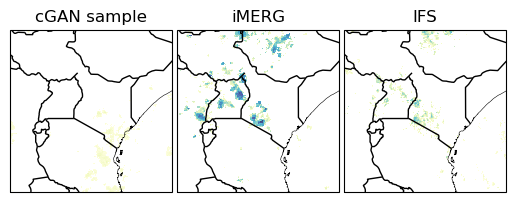

In [30]:

k = 0
n = 0

plt.subplot(gs[(spacing*n):(spacing+spacing*n), (spacing*k):(spacing+spacing*k)],
                        projection=ccrs.PlateCarree())
ax = plt.gca()
ax.coastlines(resolution='10m', color='black', linewidth=linewidth)
plot_img_log_coastlines(avg_img_gens,
                                        value_range_precip=value_range_precip,
                                        cmap=cmap,
                                        extent=extent,
                                        alpha=alpha)
ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.LAKES)
ax.set_title('cGAN sample')

##  iMERG
k = 1

plt.subplot(gs[(spacing*n):(spacing+spacing*n), (spacing*k):(spacing+spacing*k)],
                        projection=ccrs.PlateCarree())
ax = plt.gca()
ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.LAKES)
ax.coastlines(resolution='10m', color='black', linewidth=linewidth)
plot_img_log_coastlines(truth[0, :,:,0],
                                        value_range_precip=value_range_precip,
                                        cmap=cmap,
                                        extent=extent,
                                        alpha=alpha)
print('iMERG max: ', truth[0, :,:,0].max())
ax.set_title('iMERG')

## forecast / reanalysis
k = 2

plt.subplot(gs[(spacing*n):(spacing+spacing*n), (spacing*k):(spacing+spacing*k)],
                        projection=ccrs.PlateCarree())
ax = plt.gca()
ax.coastlines(resolution='10m', color='black', linewidth=linewidth)
plot_img_log_coastlines(fcst[0, :,:,tp_index],
                                        value_range_precip=value_range_precip,
                                        cmap=cmap,
                                        extent=extent,
                                        alpha=alpha)
print('Forecast max: ', fcst[0, :,:,tp_index].max())
ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.LAKES)
ax.set_title('IFS')